In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Load Dataset ---
file_path = "D:/dm_assignment/datasets/knn_dataset.csv"
df = pd.read_csv(file_path)

# Features and target
X = df[['x1', 'x2', 'x3']]
y = df['label']

In [6]:
# Train KNN with k=4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X, y)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [7]:
# Classify new point (2,3,4)
new_point = [[2, 3, 4]]
prediction = knn.predict(new_point)

print(f"Classification of (2,3,4): {prediction[0]}")

Classification of (2,3,4): A


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


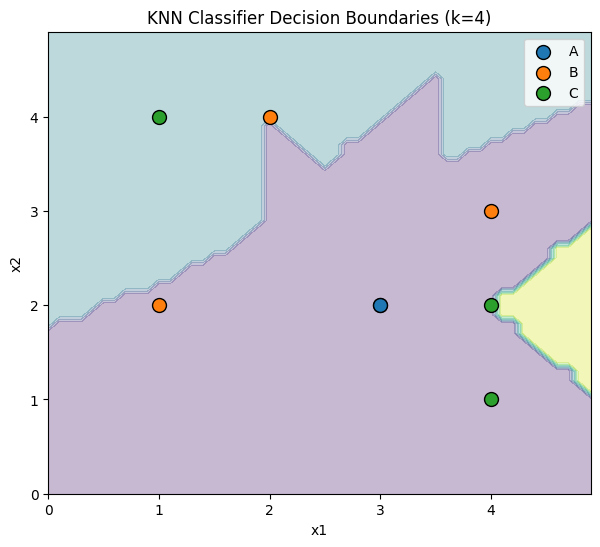

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# --- 1. Load Dataset ---
df = pd.read_csv("D:/dm_assignment/datasets/knn_dataset.csv")

# Encode labels to numbers for plotting
le = LabelEncoder()
y = le.fit_transform(df['label'])   # convert A,B,C -> 0,1,2

X = df[['x1', 'x2']].values

# --- 2. Train KNN ---
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X, y)

# --- 3. Decision Boundaries ---
h = 0.1
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# --- Plot Data Points ---
for class_index, class_label in enumerate(le.classes_):
    subset = df[df['label'] == class_label]
    plt.scatter(subset['x1'], subset['x2'], label=class_label, s=100, edgecolors='k')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("KNN Classifier Decision Boundaries (k=4)")
plt.legend()
plt.show()